# Numpy Package

In [1]:
# Import necessary packages
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as md
import pandas as pd
import seaborn as sns

# magic command
%matplotlib inline
#set figure size
plt.rcParams['figure.figsize'] = [10, 5]

# 1. Overall purpose of numpy.random package

The purpose of the numpy.random package is to generate pseudo random numbers. This is acheived by passing arguments to numpy that determine the shape and size of the random array. These parameters allow numpy to generate seemingly random numbers with a deterministic input. The overall shape and output of the numpy.random package can be determined by the use of in-built functions which will be explored further in this assignment.

# 2. Simple Random Data and Permutation functions

## Simple Random Data

On the numpy.random documentation the simple random data section contains a set of functions that return random samples primarily in the uniform distribution. 

The uniform distribution will be explained in the following examples, along with other types of distributions used here.

## numpy.random.rand
[numpy.random.rand](https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.random.rand.html#numpy.random.rand) returns random values in a given shape (d0, 1, ..., dn). The parameters provided to the function determine the number of samples in the array, as well as the number of arrays. If no parameters are provided than the function returns a single random sample. The samples are returned in a uniform distribution in the half open interval [0.0, 1.0).

In the unifrom distribution, the random samples are equally likely to appear at each interval.

## numpy.random.randn
[nump.random.randn](https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.random.randn.html#numpy.random.randn) is similar to the previous function insofar as the parameters are the same. However, the function returns the samples in the standard normal distribution.

The standard normal distribution has a centre of 0 with a higher density of samples around the centre with the density of samples reducing the further they fall from the centre.

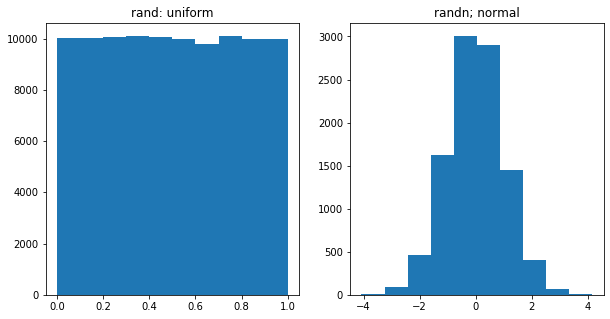

In [165]:
# rand and randn functions with same sample size
uniform = np.random.rand(100000)
normal = np.random.randn(10000)

# histogram of rand function
plt.subplot(1, 2, 1)
plt.hist(uniform)
plt.title('rand: uniform')
plt.show

# histogram of randn function
plt.subplot(1, 2, 2)
plt.hist(normal)
plt.title('randn; normal')
plt.show()

### numpy.random.randint
[numpy.random.randint](https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.random.randint.html#numpy.random.randint) returns samples of integers in the uniform distribution. Samples are drawn in the half open interval, lower integer which is inclusive, and higher integer, which is exclusive.

A real world example of this function can be seen in the visualisation of dice rolls over a given sample size.

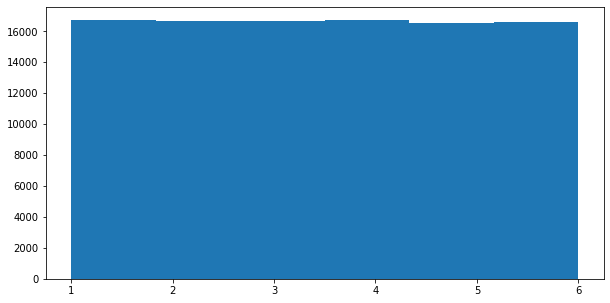

In [168]:
# low integer of 1, higher integer of 7, 100000 samples
d1 = np.random.randint(1, 7, 100000, dtype=int)
# histogram of distribution
plt.hist(d1, 6)
plt.show()


### numpy.random.bytes
[numpy.random.bytes](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.random.bytes.html#numpy.random.bytes) returns random bytes in a given size

A byte is a unit of digital information consisting of 8 bits.

In [27]:
# generate 10 random bytes 
np.random.bytes(10)

b'r\xdd\xc7\x16\xfa`e\x0e D'

## Permutations

Permutations arrange or rearrange the sequence of an array. 

### Shuffle

[Shuffle](https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.random.shuffle.html#numpy.random.shuffle) changes the order of an already known sequence by rearranging it's contents. A common example of this is seen in a music player's shuffle function.

Music albums come with a set playing order. On a twelve track album we can assign the array ([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]).

In [34]:
# array of 12 numbers
arr = np.arange(12)
arr

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

If the shuffle function is called the sequence of tracks is rearranged.

In [35]:
# shuffle the array
np.random.shuffle(arr)

In [36]:
#shuffled output
arr

array([ 5,  2,  7,  0, 11, 10,  1,  6,  4,  3,  9,  8])

To demonstrate this further we can take Lewis Capldi's debut album _Divinely Uninspired to a Hellish Extent_.

In [37]:
# created an array containing the track titles in the original order
lp = (['Grace', 'Bruises', 'Hold Me While You Wait', 'Someone You Loved', 'Maybe', 'Forever', 'One', 'Dont Get Me Wrong', 'Hollywood', 'Lost on You', 'Fade', 'Headspace',])
lp

['Grace',
 'Bruises',
 'Hold Me While You Wait',
 'Someone You Loved',
 'Maybe',
 'Forever',
 'One',
 'Dont Get Me Wrong',
 'Hollywood',
 'Lost on You',
 'Fade',
 'Headspace']

In [38]:
# shuffled the player order of the album
np.random.shuffle(lp)
lp

['Lost on You',
 'One',
 'Fade',
 'Hold Me While You Wait',
 'Hollywood',
 'Grace',
 'Headspace',
 'Dont Get Me Wrong',
 'Bruises',
 'Someone You Loved',
 'Maybe',
 'Forever']

### Permutation
[Permutation](https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.random.permutation.html#numpy.random.permutation) outputs a randomly ordered array in a given size.

In [140]:
# random permutation with the size of 10
np.random.permutation(10)

array([5, 3, 7, 6, 4, 8, 1, 9, 0, 2])

In [141]:
arr_2 = np.arange(9).reshape((3, 3))
np.random.permutation(arr_2)

array([[3, 4, 5],
       [6, 7, 8],
       [0, 1, 2]])

# 3. Distributions

## Geometric Distribution
The [Geometric Distribution](https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.random.geometric.html#numpy.random.geometric) models the number of trials must be run in order to provide a successful result.

[Bernoulli Trial](https://en.wikipedia.org/wiki/Bernoulli_trial)

A Bernoulli Trial is a random experiment where the results are either success or failure. Essentially, a Bernoulli Trial deals with "yes" or "no" questions. A straight forward example of this is a coin flip where the results can either be heads or tails. 



In [5]:
# 100000 coin flips with a probability rate of 50%
heads = np.random.geometric(p=0.5, size=100000)
(heads == 1).sum()/100000.

0.50007

# Poisson  Distribution
The [Poison Distribution](https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.random.poisson.html#numpy.random.poisson) describes the probability of a given number of events occuring in a fixed interval. These events occur at a constant rate and independently of the previous event. That is to say the occurence of a single event does not predict the probility of a future event.

A practical example of this can be seen in generating some random data that mimicks the number of incoming calls at a call centre in a set time period. 

[Pandas time series/ date functionality](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html) was used to create a time series that specified business hours only (09:00 to 17:00). This time series was than used as the index for samples randomly generated by the poisson distribution.


In [6]:
# set business hours 
bh = pd.offsets.BusinessHour()
# date range for two work days 
rng = pd.date_range('10/07/2019', periods=16, freq=bh)
# simulated data for number of inbound calls in work week
# average number of events is 100 per period of time 
ts = pd.DataFrame(np.random.poisson(100, len(rng)), index=rng, columns=['Inbound Calls'])
ts

,Inbound Calls
2019-10-07 09:00:00,86
2019-10-07 10:00:00,105
2019-10-07 11:00:00,95
2019-10-07 12:00:00,98
2019-10-07 13:00:00,98
2019-10-07 14:00:00,111
2019-10-07 15:00:00,107
2019-10-07 16:00:00,91
2019-10-08 09:00:00,127
2019-10-08 10:00:00,105


With random call data generated with the poisson distribution the dataframe can be visualised with a lineplot.

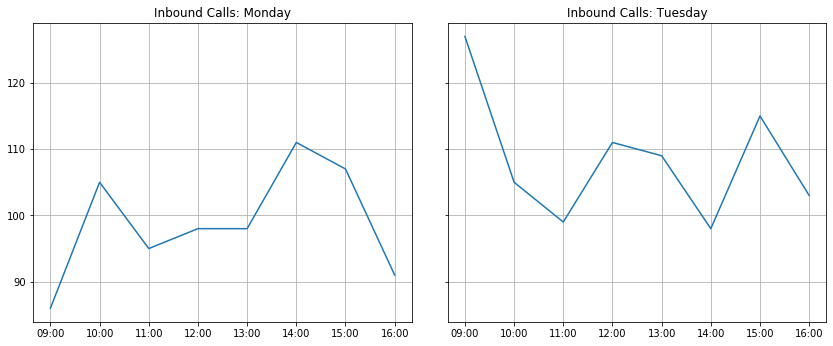

In [8]:
# sliced data frame in sections for monday and tuesday 
mon = ts.loc['2019-10-07 09:00:00':'2019-10-07 16:00:00']
tue = ts.loc['2019-10-08 09:00:00':'2019-10-08 16:00:00']

# created subplots sharing same y-axis
fig, (ax1, ax2) = plt.subplots(1,2, sharey=True, figsize=(12, 5))
fig.tight_layout(pad=2)

# plot of mondays calls 
ax1.plot(mon)
ax1.grid()
ax1.set_title('Inbound Calls: Monday')
#set  x-axis date format to just include hours and minutes 
ax1.xaxis.set_major_formatter(md.DateFormatter('%H:%M'))

# plot of tuesdays calls 
ax2.plot(tue)
ax2.grid()
ax2.set_title('Inbound Calls: Tuesday')
ax2.xaxis.set_major_formatter(md.DateFormatter('%H:%M'))

plt.show()

## Triangular Distribution
The [Triangular Distribution](https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.random.triangular.html#numpy.random.triangular) is useful as a means of prediction when limited information is known. There are three parameters of the triangular distribution, the best-case estimate, the worst case estimate and the most likely estimate.

There are three parameters to the triangular distribution, a lower limit(a) an upper limit(b), the mode(c), and the size of the output, where a ≤ c ≤ b.

The following example details the expected sales of a company over the course of a month where the minimum expected sales is to the value of €1000, the maximum expected sales is €6000, and the realistic value of expected sales is €3000. 

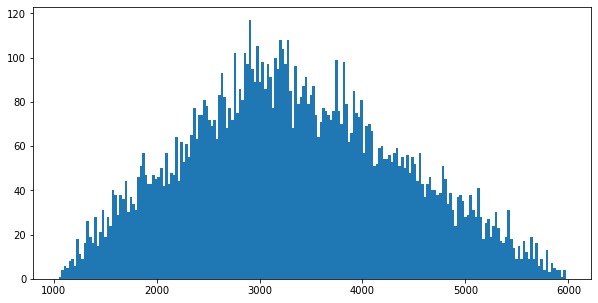

In [145]:
# Triangualr distribution where a=1000, b=6000, c=3000, with size of 10000
plt.hist(np.random.triangular(1000, 3000, 6000, 10000), bins=200)
plt.show()

## Standard_t Distribution
The [Standard_t Distribution](https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.random.standard_t.html#numpy.random.standard_t) draws samples from a standard Student's t distribution.

[Student's t distribution](https://en.wikipedia.org/wiki/Student%27s_t-distribution) 
<blockquote>arises when estimating the mean of a normally distributed population in situations where the sample size is small and the population standard deviation is unknown.</blockquote>

The data for how many kilometres each team in the Premier League ran for the 2018/19 season was collected. Taking 3475 kilometres as the recommended distance each team should cover over the course of the season a student's t-test can be applied.

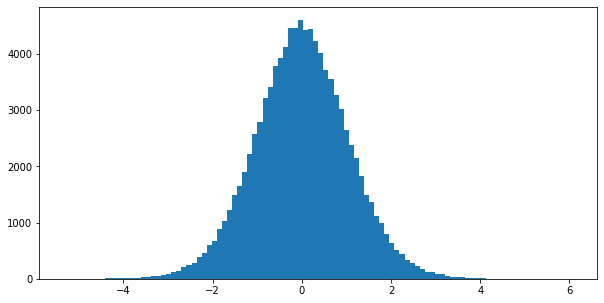

In [146]:
# array of km run by premier league teams for 2018/19 season
km = np.array([3134, 3176, 3240, 3308, 3326, 3329, 3332, 3359, 3363, 3389, 3402, 3411, 3428, 3451, 3466, 3491, 3509, 3523, 3532, 3539])

# 20 samples in array so 19 degrees of freedom
s = np.random.standard_t(19, size=100000)

plt.hist(s, bins=100)
plt.show()

In [147]:
# set target for km run by team to 3475km
t = (np.mean(km)-3475)/(km.std(ddof=1)/np.sqrt(len(km)))

In [148]:
# The result indicates null hypothesis has about 99% probability of being accurate 
np.sum(s<t)/float(len(s))

0.00143

## Hypergeometric Distribution
The [Hypergeometric Distribution](https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.random.hypergeometric.html#numpy.random.hypergeometric) can be applied to a hand of texas hold'em poker. Assume that the player has one heart card in their hand and two out of the three cards drawn for the first round are also hearts. The 
hypergeomtric distribution can be used to predict the probability that (a) one of the next two cards drawn will be hearts, (b) that both of the next two cards will be hearts, and (c) that neither of the next two cards drawn will be hearts.

The distribution requires three main parameters, the number of successful selections, the number of unsuccessful selections, and the number of drawes made. The final parameter is the size of the output. In this case, it is known that 10 hearts remain in the deck as 3 have already been drawn, 37 non-hearts remain as 2 have already been drawn. 

In [9]:
# set ngood, nbad, and nsample values 
ngood, nbad, nsamp = 10, 37, 2
#passed values to the hypergeometric distribution
s = np.random.hypergeometric(ngood, nbad, nsamp, 100000)

# probability of 1 card being a heart
np.sum(s==1)/100000


0.34018

In [10]:
# probability of both cards being hearts
np.sum(s>1)/100000

0.042

In [11]:
# probability of neither cards being hearts
np.sum(s<1)/100000

0.61782

To take this example further, assume that the 3 hearts that are known form part of a straight flush, consequetive cards of the same suit. Now, what are the chnaces of (a) one of the next two cards drawn being part of the required sequence, (b) both cards being part of the required sequence, and (c) neither cards being part of the required sequence.

For the purpose of simplification we will assume that cards already drawn are the 2, 3, and 4 of hearts. This means that there are only two possible successful selections, the 5, and 6 of hearts. 

In [20]:
# set ngood, nbad, and nsample values 
sf = np.random.hypergeometric(2, 45, 2, 100000)
# probability of either 5 or 6 of hearts being drawn
np.sum(sf==1)/100000

0.12288

In [21]:
# probability of both cards being drawn
np.sum(sf>1)/100000

0.00289

In [17]:
# probability of neither cards bein drawn
np.sum(sf<1)/100000

0.87579

# 4. Seeds
A seed is a number used to initialise a pseudorandom number generator. The seed itself does not need to be random, as long as the seed is ignored, the rest of the generated valies will follow a given probability distribution.

## numpy.random.RandomState
The [numpy.random.RandomState](https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.random.RandomState.html#numpy.random.RandomState) generator is a container for the Mersenne Twister pseudo-random number generator.

An int or an array can be provided to the generator to act as a seed. 


In [29]:
# initialised the generator with a seed of 9
rng = np.random.RandomState(9)

In [30]:
# generated a random array in poisson distribution
rng.poisson(3, 9)

array([0, 2, 1, 2, 3, 0, 6, 6, 5])